# Imports

In [1]:
from keras.datasets import imdb
from keras.preprocessing import sequence

import os
import tensorflow as tf
import numpy as np

# Data

In [2]:
len(imdb.get_word_index())

1654784/1641221 [==============================] - 0s 0us/step


88584

So, there are 88,584 unique words in the dataset.

In [3]:
VOCAB_SIZE = 88584
MAXLEN = 250
BATCH_SIZE = 64

In [4]:
(train_data, train_label), (test_data, test_label) = imdb.load_data(num_words=VOCAB_SIZE)

17473536/17464789 [==============================] - 0s 0us/step


In [5]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [6]:
np.unique(train_label)

array([0, 1])

**Preprocessing**

since we cannot pass information of different lengths into the neural networks, we need to trim long sequences and pad short sequences.

In [7]:
train_data = sequence.pad_sequences(train_data, MAXLEN)
test_data = sequence.pad_sequences(test_data, MAXLEN)

# Model

In [8]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(VOCAB_SIZE, 32))
model.add(tf.keras.layers.LSTM(32))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          2834688   
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 2,843,041
Trainable params: 2,843,041
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['acc']
              )

In [10]:
history = model.fit(train_data, train_label,
                    epochs=5,
                    validation_split=0.2
                    )

Epoch 1/5
625/625 [==============================] - 16s 13ms/step - loss: 0.4203 - acc: 0.8109 - val_loss: 0.3059 - val_acc: 0.8732
Epoch 2/5
625/625 [==============================] - 7s 11ms/step - loss: 0.2396 - acc: 0.9089 - val_loss: 0.3447 - val_acc: 0.8704
Epoch 3/5
625/625 [==============================] - 8s 12ms/step - loss: 0.1843 - acc: 0.9319 - val_loss: 0.3166 - val_acc: 0.8886
Epoch 4/5
625/625 [==============================] - 7s 12ms/step - loss: 0.1491 - acc: 0.9469 - val_loss: 0.2800 - val_acc: 0.8982
Epoch 5/5
625/625 [==============================] - 8s 12ms/step - loss: 0.1273 - acc: 0.9547 - val_loss: 0.2755 - val_acc: 0.8876


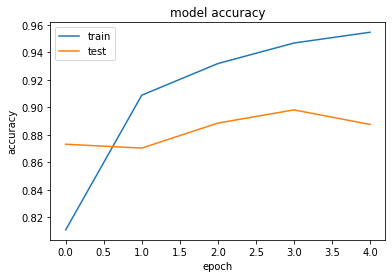

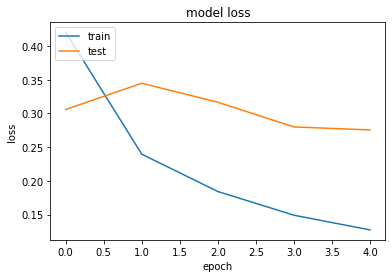

In [13]:
import matplotlib.pyplot as plt

#=====================================================
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#=====================================================
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [14]:
print(model.evaluate(test_data, test_label))

782/782 [==============================] - 5s 6ms/step - loss: 0.3146 - acc: 0.8699
[0.3146347403526306, 0.869920015335083]


# Prediction

In [15]:
predictions = model.predict(test_data)

In [17]:
predictions>0.5

array([[False],
       [ True],
       [ True],
       ...,
       [False],
       [False],
       [ True]])

Values greater than 0.5 means "positive review", else "negative review".

In [18]:
word_index = imdb.get_word_index()

def encode_text(text):
  tokens = tf.keras.preprocessing.text.text_to_word_sequence(text)
  tokens = [word_index[word] if word in word_index else 0 for word in tokens]
  return sequence.pad_sequences([tokens], MAXLEN)[0]

In [19]:
text = input()
encoded = encode_text(text)
print(encoded)

Hello, can you hear me?
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0   

In [20]:
def predict(text):
  encoded_text = encode_text(text)
  predict = np.zeros((1,250))
  predict[0] = encoded_text
  print(model.predict(predict))

In [21]:
predict(input())

this movie was awesome!
[[0.2719724]]


so, this was classified as a negative review.

In [22]:
predict(input())

this movie was a complete waste of time
[[0.47170275]]


In [23]:
predict(input())

I fell asleep during this movie and haven't watched all the way to the end yet because it's so boring
[[0.8106103]]


this is an actual review for "*Avengers: Endgame*" on IMDb. Seriously! But my classifier has succesfully misclassified it as a positive review!

# Reuters Newswire Classification

In [27]:
from keras.datasets import reuters

len(reuters.get_word_index())

565248/550378 [==============================] - 0s 0us/step


30979

In [28]:
VOCAB_SIZE = 30979

(train_data, train_label), (test_data, test_label) = reuters.load_data(num_words=VOCAB_SIZE)

np.unique(train_label)

2121728/2110848 [==============================] - 0s 0us/step


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

In [29]:
print(train_data[0])

[1, 27595, 28842, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [30]:
train_data = sequence.pad_sequences(train_data, MAXLEN)
test_data = sequence.pad_sequences(test_data, MAXLEN)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(VOCAB_SIZE, 32))
model.add(tf.keras.layers.LSTM(32))
model.add(tf.keras.layers.Dense(46, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          991328    
                                                                 
 lstm_1 (LSTM)               (None, 32)                8320      
                                                                 
 dense_1 (Dense)             (None, 46)                1518      
                                                                 
Total params: 1,001,166
Trainable params: 1,001,166
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Nadam(learning_rate=0.01),
              metrics=['acc']
              )

history = model.fit(train_data, train_label,
                    epochs=5,
                    validation_split=0.2
                    )

Epoch 1/5
225/225 [==============================] - 5s 15ms/step - loss: 2.0348 - acc: 0.4740 - val_loss: 1.7575 - val_acc: 0.5292
Epoch 2/5
225/225 [==============================] - 3s 13ms/step - loss: 1.5501 - acc: 0.6039 - val_loss: 1.4173 - val_acc: 0.6266
Epoch 3/5
225/225 [==============================] - 3s 13ms/step - loss: 1.1415 - acc: 0.7113 - val_loss: 1.1650 - val_acc: 0.7201
Epoch 4/5
225/225 [==============================] - 3s 13ms/step - loss: 0.8330 - acc: 0.7911 - val_loss: 1.0833 - val_acc: 0.7295
Epoch 5/5
225/225 [==============================] - 3s 13ms/step - loss: 0.6266 - acc: 0.8402 - val_loss: 1.0671 - val_acc: 0.7507


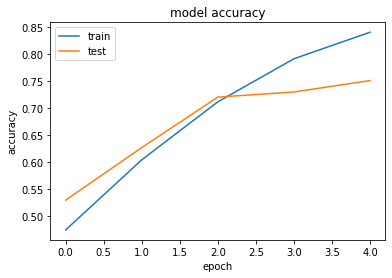

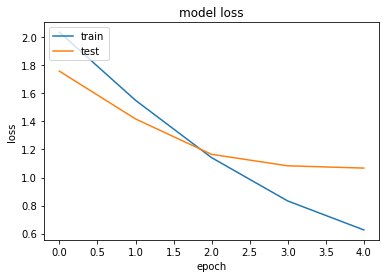

In [32]:
#=====================================================
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#=====================================================
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [33]:
print(model.evaluate(test_data, test_label))

71/71 [==============================] - 1s 10ms/step - loss: 1.1117 - acc: 0.7373
[1.111672043800354, 0.7373107671737671]


# Text Generation

In [35]:
path_to_file = tf.keras.utils.get_file('shakespeare.txt',
                                       'https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt')

1130496/1115394 [==============================] - 0s 0us/step


In [36]:
text = open(path_to_file, 'rb').read().decode(encoding='utf-8')

len(text)

1115394

In [38]:
print(text[:250])

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.



In [39]:
vocab = sorted(set(text))

char2idx = {u:i for i, u in enumerate(vocab)}
idx2char = np.array(vocab)

def text2int(text):
  return np.array([char2idx[c] for c in text])

text_as_int = text2int(text)

print(text[:20])
print(text_as_int[:20])

First Citizen:
Befor
[18 47 56 57 58  1 15 47 58 47 64 43 52 10  0 14 43 44 53 56]


In [40]:
def int2text(ints):
  try:
    ints = ints.numpy()
  except:
    pass
  return ''.join(idx2char[ints])

print(int2text(text_as_int[:20]))

First Citizen:
Befor


In [42]:
seq_length = 100
examples_per_epoch = len(text)//(seq_length+1)

char_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)
sequences = char_dataset.batch(seq_length+1, drop_remainder=True)

In [43]:
def split_input_target(chunk):
  # chunk = Hello
  input_text = chunk[:-1]  # Hell
  target_text = chunk[1:]  # ello
  return input_text, target_text

In [45]:
dataset = sequences.map(split_input_target)

for x, y in dataset.take(2):
  print(f"INPUT:\n{int2text(x)}\n\nOOUTPUT:\n{int2text(y)}")

INPUT:
First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You

OOUTPUT:
irst Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You 
INPUT:
are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you 

OOUTPUT:
re all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you k


In [46]:
BATCH_SIZE = 64
VOCAB_SIZE = len(vocab)
EMBEDDING_DIM = 256
RNN_UNITS = 1024
BUFFER_SIZE = 10000

In [47]:
data = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)

In [53]:
def build_model(vocab_size, embedding_dim, rnn_units, batch_size):
  model = tf.keras.Sequential([tf.keras.layers.Embedding(vocab_size, embedding_dim,
                                                         batch_input_shape=[batch_size, None]),
                               tf.keras.layers.LSTM(rnn_units,
                                                    return_sequences=True,
                                                    stateful=True,
                                                    recurrent_initializer='glorot_uniform'),
                               tf.keras.layers.Dense(vocab_size)
                               ])
  return model

In [54]:
model = build_model(VOCAB_SIZE, EMBEDDING_DIM, RNN_UNITS, BATCH_SIZE)
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (64, None, 256)           16640     
                                                                 
 lstm_3 (LSTM)               (64, None, 1024)          5246976   
                                                                 
 dense_3 (Dense)             (64, None, 65)            66625     
                                                                 
Total params: 5,330,241
Trainable params: 5,330,241
Non-trainable params: 0
_________________________________________________________________


In [57]:
def loss(labels, logits):
  return tf.keras.losses.SparseCategoricalCrossentropy(labels, logits,
                                                       from_logits=True)
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              )

In [51]:
checkpoint_dir = './train_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, 'ckpt_{epoch}')
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_prefix,
                                                         save_weights_only=True
                                                         )

In [58]:
history = model.fit(data, epochs=25,
                    callbacks=[checkpoint_callback])

Epoch 1/25
172/172 [==============================] - 13s 62ms/step - loss: 2.8871
Epoch 2/25
172/172 [==============================] - 12s 63ms/step - loss: 1.9004
Epoch 3/25
172/172 [==============================] - 12s 63ms/step - loss: 1.7252
Epoch 4/25
172/172 [==============================] - 12s 64ms/step - loss: 1.6410
Epoch 5/25
172/172 [==============================] - 12s 64ms/step - loss: 1.5832
Epoch 6/25
172/172 [==============================] - 12s 65ms/step - loss: 1.5446
Epoch 7/25
172/172 [==============================] - 14s 68ms/step - loss: 1.5146
Epoch 8/25
172/172 [==============================] - 14s 66ms/step - loss: 1.4934
Epoch 9/25
172/172 [==============================] - 14s 68ms/step - loss: 1.4737
Epoch 10/25
172/172 [==============================] - 14s 68ms/step - loss: 1.4601
Epoch 11/25
172/172 [==============================] - 14s 69ms/step - loss: 1.4447
Epoch 12/25
172/172 [==============================] - 13s 67ms/step - loss: 1.4352
E

In [59]:
model = build_model(VOCAB_SIZE, EMBEDDING_DIM, RNN_UNITS, batch_size=1)
model.load_weights(tf.train.latest_checkpoint(checkpoint_dir))
model.build(tf.TensorShape([1, None]))

In [60]:
def generate_text(model, start_string):
  num_generate = 800
  input_eval = [char2idx[s] for s in start_string]
  input_eval = tf.expand_dims(input_eval, 0)
  text_generated = []
  temperature = 1.0
  model.reset_states()
  for i in range(num_generate):
      predictions = model(input_eval)
      predictions = tf.squeeze(predictions, 0)
      predictions = predictions / temperature
      predicted_id = tf.random.categorical(predictions, num_samples=1)[-1,0].numpy()
      input_eval = tf.expand_dims([predicted_id], 0)
      text_generated.append(idx2char[predicted_id])
  return (start_string + ''.join(text_generated))

In [61]:
inp = input("Type a starting string: ")
print(generate_text(model, inp))

Type a starting string: Soldier, on your left. But donot turn left. You are not an avenger, not yet.
Soldier, on your left. But donot turn left. You are not an avenger, not yet.

HASTINGS:
Friar lies a foot oak revokes!
Would so. or never good?
When the king death, and speak them for Captably,
The horse will not advertise.

First CHIsilil: so hareavier pair r hus we'll live in a man.

CORIOLANUS:
One than my worsay with neach.

CORIOLANUS:
O, pance your wrong
I have look did shunts, here is alouding-which ome.

LUCIO:
A plain staw down your fight stin-bold:
No, no? go do it Cauban up me them set you,
To the mercy, good man-shain son, not death's senate' doubled ruled in that Easl' came crossed:
My solemn my greaterous father passade
That you make me thy unwill answer's.

Third Master I may
How thou seen upon thee, thou shamember'd shall get thee;
Both Compers of Hortens rest.
Had it is to him in a sin,
And movers, which raise it person'd'st the fire, he
goatous m


Thank you freecodecamp and Tech with tim [https://colab.research.google.com/drive/1ysEKrw_LE2jMndo1snrZUh5w87LQsCxk#forceEdit=true&sandboxMode=true&scrollTo=cAJqhD9AA5mF](https://colab.research.google.com/drive/1ysEKrw_LE2jMndo1snrZUh5w87LQsCxk#forceEdit=true&sandboxMode=true&scrollTo=cAJqhD9AA5mF)